# Exploratory Data Analysis

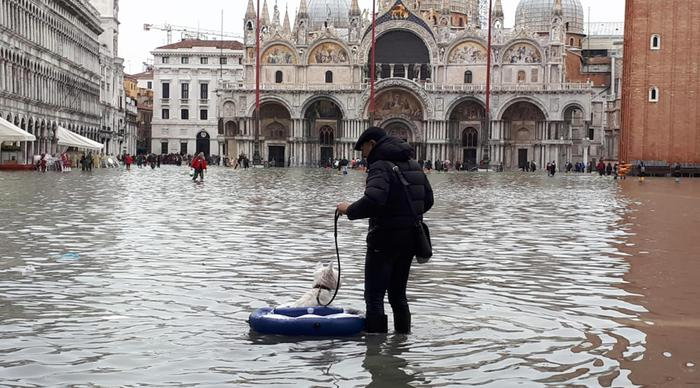

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from datetime import datetime
import datetime
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium import plugins
import seaborn as sns 

# Sensors Location in Venice's Map
* Station for data collection at Punta della Salute
* Station for data collection at San Giorgio
* Station for data collection at Burano 
* Station for data collection at Malamocco 
* Station for data collection at Chioggia

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
folium_map = folium.Map(location=[45.438759, 12.327145],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")

popups = ['Punta della Salute','San Giorgio', 'Burano','Malamocco','Chioggia']
data = np.array([np.array([45.431078,45.428408,45.487503,45.339800,45.232539]),np.array([12.336378, 12.346264, 12.415486, 12.291967, 12.280597 ])]).T


plugins.MarkerCluster(data,popups).add_to(folium_map)

folium_map

# station : Punta della Salute

In [ ]:
df1 = pd.read_csv('/kaggle/input/venice-high-water-acqua-alta/VeneziaPuntaSalute.csv',delimiter=',')
df1.columns = ['date','time','liv','temp']

df1.time = df1.time.map(lambda x: x.rstrip('AMP').replace(';',''))
df1.temp = df1.temp.map(lambda x: x.replace(';','')).replace(r'^\s*$', np.nan, regex=True).astype(float)

# df1.isnull().sum()

df1.liv = df1.liv.fillna(method='pad')
df1.temp = df1.temp.fillna(method='pad')

#df1.isnull().sum()

dt = datetime.datetime(2019, 10, 10, 0, 10, 0)
end = datetime.datetime(2020, 1, 11, 0, 10, 0)
step = datetime.timedelta(minutes=10)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

df1.insert(0,'datetime',result)

# station : San Giorgio

In [ ]:
df2 = pd.read_csv('/kaggle/input/venice-high-water-acqua-alta/VeneziaSanGiorgio.csv',delimiter=',')
df2.columns = ['date','time','vv','vmax','dv','tair','um','rs']
# df2.time = df2.time.map(lambda x: x.rstrip('AMP').replace(';',''))

dt = datetime.datetime(2019, 10, 11, 1, 0, 0)
end = datetime.datetime(2020, 1, 12, 1, 0, 0)
step = datetime.timedelta(hours=1)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

df2.insert(0,'datetime',result)
df2.drop(['date','time'],axis=1, inplace=True)

## stations : Burano - Malamocco - Chioggia

In [ ]:
df3 = pd.read_csv('/kaggle/input/venice-high-water-acqua-alta/burano.csv',delimiter=',')
df4 = pd.read_csv('/kaggle/input/venice-high-water-acqua-alta/malamocco.csv',delimiter=',')
df5 = pd.read_csv('/kaggle/input/venice-high-water-acqua-alta/chioggia.csv',delimiter=',')

df3 = df3.iloc[1:,:]
df4 = df4.iloc[1:,:]
df5 = df5.iloc[1:,:]

In [ ]:
df3.columns = ['date','time','liv']
df4.columns = ['date','time','liv']
df5.columns = ['date','time','liv']

df3.time = df3.time.map(lambda x: x.rstrip('AMP').replace(';',''))
df4.time = df4.time.map(lambda x: x.rstrip('AMP').replace(';',''))
df5.time = df5.time.map(lambda x: x.rstrip('AMP').replace(';',''))

df3.liv = df3.liv.fillna(method='pad')
df4.liv = df4.liv.fillna(method='pad')
df5.liv = df5.liv.fillna(method='pad')

dt = datetime.datetime(2019, 10, 11, 0, 10, 0)
end = datetime.datetime(2020, 1, 12, 0, 10, 0)
step = datetime.timedelta(minutes=10)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

df3.insert(0,'datetime',result)
df4.insert(0,'datetime',result)
df5.insert(0,'datetime',result)

df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')


In [ ]:
df1 = df1[df1['datetime']>='2019-10-11 00:10:00']
df3 = df3[df3['datetime']<='2020-01-11 00:00:00']
df4 = df4[df4['datetime']<='2020-01-11 00:00:00']
df5 = df5[df5['datetime']<='2020-01-11 00:00:00']


In [ ]:
df1 = df1.reset_index().drop('index',axis=1)
df3 = df3.reset_index().drop('index',axis=1)
df4 = df4.reset_index().drop('index',axis=1)
df5 = df5.reset_index().drop('index',axis=1)

df_all_sensors = pd.concat([df1.datetime, df1.liv,df3.liv,df4.liv,df5.liv],axis=1)
df_all_sensors = df_all_sensors#.astype(float)
df_all_sensors.columns = ['datetime', 'Punta della Salute',
                   'Burano','Malamocco','Chioggia']

df_all_sensors['datetime'] = pd.to_datetime(df_all_sensors['datetime'])
df_all_sensors.head()

In [ ]:
df_all_sensors['month'] = df_all_sensors['datetime'].dt.month
df_all_sensors['hour'] = df_all_sensors['datetime'].dt.hour
df_all_sensors['week'] = df_all_sensors['datetime'].dt.week

In [ ]:
df = df_all_sensors.melt(id_vars=['hour','week','month'], value_vars=['Punta della Salute','Burano','Malamocco','Chioggia'],
        var_name='station', value_name='liv')

df.liv = df.liv.astype('float')

df.head()

In [ ]:

# water trends
sns.relplot(data = df, x = 'hour', y = "liv", kind='line',
            markers=True, height=5, aspect=1.7, 
               col = 'month', 
               hue = 'station',
            style="station")
